<a href="https://colab.research.google.com/github/Alok595/Project2HousePridiction/blob/main/project_2GUVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv("/content/sample_housing_dataset_1000_rows.csv")  #Loading Dataset
data.head()

,Area (sqft),Bedrooms,Location,Price (Lakh),Bathrooms,Furnishing,Parking,Age,Balcony
0,1826.0,3.0,Lucknow,87.3,5.0,Semi-Furnished,1.0,4.0,3.0
1,1469.0,2.0,Pune,72.2,4.0,Unfurnished,2.0,10.0,0.0
2,NaN,3.0,Surat,NaN,1.0,Unfurnished,1.0,13.0,0.0
3,866.0,NaN,Nagpur,47.8,1.0,Unfurnished,2.0,10.0,1.0
4,905.0,2.0,Delhi,59.7,1.0,NaN,0.0,NaN,0.0


In [ ]:
#In My Model Required Features are ( Area (sqft), Bedrooms,location,Price (Lakh))

data= data[["Area (sqft)","Bedrooms","Location","Price (Lakh)"]]
data


,Area (sqft),Bedrooms,Location,Price (Lakh)
0,1826.0,3.0,Lucknow,87.3
1,1469.0,2.0,Pune,72.2
2,NaN,3.0,Surat,NaN
3,866.0,NaN,Nagpur,47.8
4,905.0,2.0,Delhi,59.7
...,...,...,...,...
995,2206.0,4.0,Ahmedabad,149.5
996,840.0,1.0,Coimbatore,69.0
997,2451.0,2.0,Indore,172.6
998,2377.0,1.0,Nagpur,104.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area (sqft)   875 non-null    float64
 1   Bedrooms      917 non-null    float64
 2   Location      930 non-null    object 
 3   Price (Lakh)  778 non-null    float64
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


In [ ]:
data["Bedrooms"]=data["Bedrooms"].astype("Int64")  # here i convert the bedroom data type to integer
data

,Area (sqft),Bedrooms,Location,Price (Lakh)
0,1826.0,3,Lucknow,87.3
1,1469.0,2,Pune,72.2
2,NaN,3,Surat,NaN
3,866.0,<NA>,Nagpur,47.8
4,905.0,2,Delhi,59.7
...,...,...,...,...
995,2206.0,4,Ahmedabad,149.5
996,840.0,1,Coimbatore,69.0
997,2451.0,2,Indore,172.6
998,2377.0,1,Nagpur,104.2


In [ ]:
data.isnull().sum()

,0
Area (sqft),125
Bedrooms,83
Location,70
Price (Lakh),222


In [ ]:

#Q Handle missing or non-numeric data using preprocessing techniques
data = data.dropna(subset=["Price (Lakh)"])   #it reomves the nan values from  the target


data["Area (sqft)"]=data["Area (sqft)"].fillna(data["Area (sqft)"].median())    #here i am filling the missing values
data["Bedrooms"]=data["Bedrooms"].fillna(data["Bedrooms"].median())

data["Location"]=data["Location"].fillna(data["Location"].mode()[0])


data



,Area (sqft),Bedrooms,Location,Price (Lakh)
0,1826.0,3,Lucknow,87.3
1,1469.0,2,Pune,72.2
3,866.0,2,Nagpur,47.8
4,905.0,2,Delhi,59.7
5,969.0,3,Hyderabad,41.0
...,...,...,...,...
995,2206.0,4,Ahmedabad,149.5
996,840.0,1,Coimbatore,69.0
997,2451.0,2,Indore,172.6
998,2377.0,1,Nagpur,104.2


In [ ]:
data.isnull().sum()   #aging cheking is there any null values present

,0
Area (sqft),0
Bedrooms,0
Location,0
Price (Lakh),0


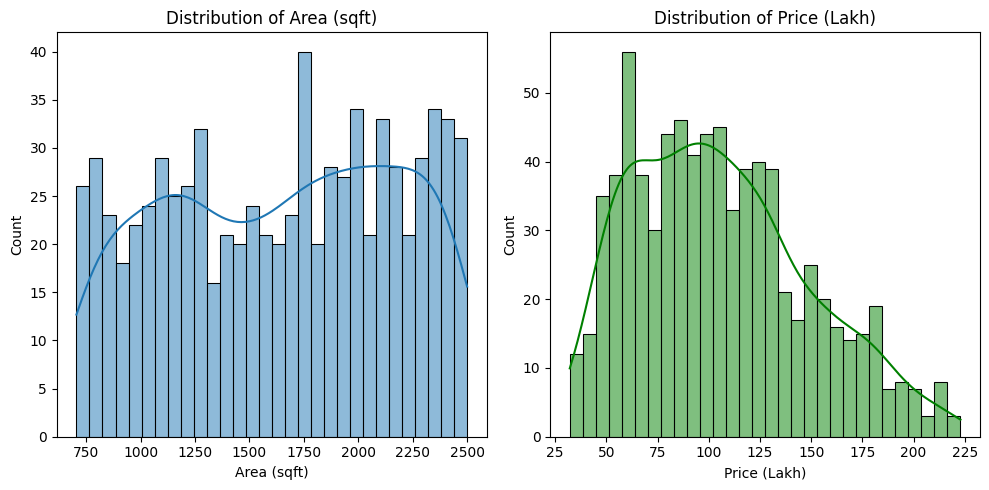

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 1️⃣ Distribution of Area
sns.histplot(df['Area (sqft)'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Distribution of Area (sqft)")
axes[0].set_xlabel("Area (sqft)")
axes[0].set_ylabel("Count")

# 2️⃣ Distribution of Price
sns.histplot(df['Price (Lakh)'], kde=True, bins=30, color="green", ax=axes[1])
axes[1].set_title("Distribution of Price (Lakh)")
axes[1].set_xlabel("Price (Lakh)")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipython-input-2995878970.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)  # Rotate for better view
/tmp/ipython-input-2995878970.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)  # Rotate for better view


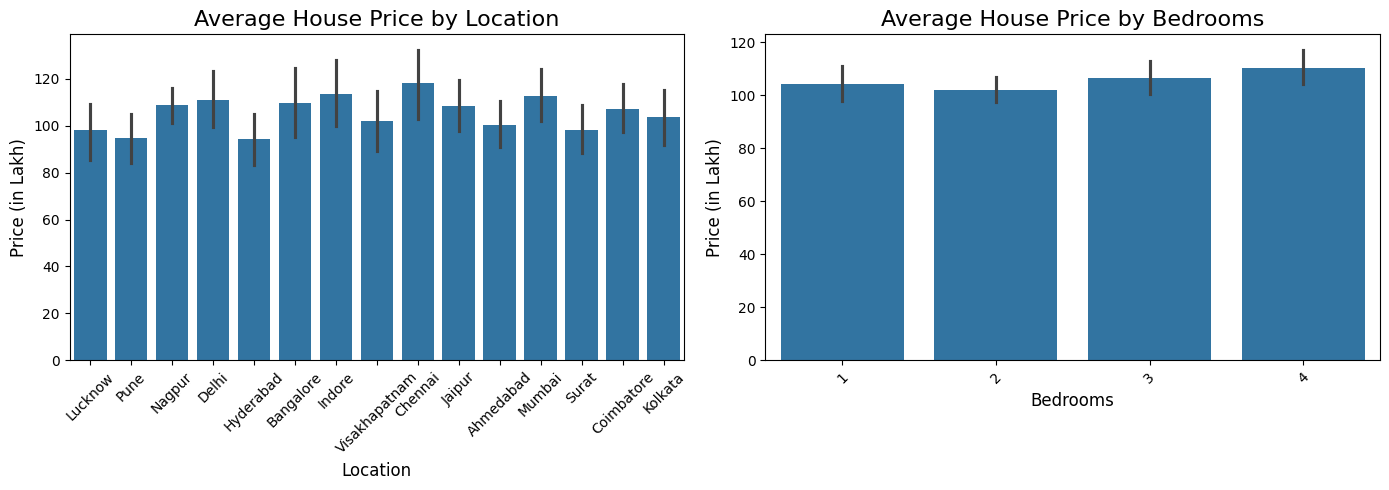

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# First bar plot: Price vs Location
sns.barplot(x="Location", y="Price (Lakh)", data=data, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)  # Rotate for better view
axes[0].set_title("Average House Price by Location", fontsize=16)
axes[0].set_xlabel("Location", fontsize=12)
axes[0].set_ylabel("Price (in Lakh)", fontsize=12)

# Second bar plot: Price vs Bedrooms
sns.barplot(x="Bedrooms", y="Price (Lakh)", data=data, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)  # Rotate for better view
axes[1].set_title("Average House Price by Bedrooms", fontsize=16)
axes[1].set_xlabel("Bedrooms", fontsize=12)
axes[1].set_ylabel("Price (in Lakh)", fontsize=12)

plt.tight_layout()  # Adjust spacing to prevent overlapping
plt.show()


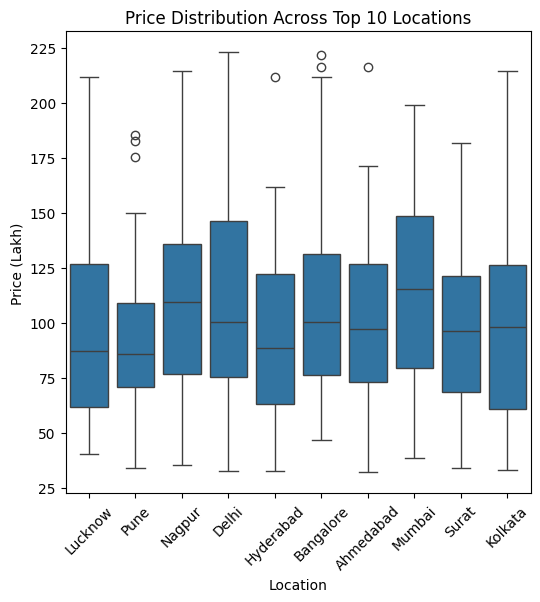

In [ ]:
# 5️⃣ Price variation across Locations (Boxplot)
plt.figure(figsize=(6,6))
top_locations = data['Location'].value_counts().nlargest(10).index
sns.boxplot(x="Location", y="Price (Lakh)", data=data[data['Location'].isin(top_locations)])
plt.title("Price Distribution Across Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Price (Lakh)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
data["Location"].unique() #now here we have to do onehot encoding

array(['Lucknow', 'Pune', 'Nagpur', 'Delhi', 'Hyderabad', 'Bangalore',
       'Indore', 'Visakhapatnam', 'Chennai', 'Jaipur', 'Ahmedabad',
       'Mumbai', 'Surat', 'Coimbatore', 'Kolkata'], dtype=object)

In [ ]:
#Q Encode categorical variables like location using one-hot encoding or label encoding
df = pd.get_dummies(data, columns=["Location"], drop_first=False)  #applying one hot encoding
df

,Area (sqft),Bedrooms,Price (Lakh),Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Indore,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Nagpur,Location_Pune,Location_Surat,Location_Visakhapatnam
0,1826.0,3,87.3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,1469.0,2,72.2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,866.0,2,47.8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,905.0,2,59.7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
5,969.0,3,41.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2206.0,4,149.5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,840.0,1,69.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
997,2451.0,2,172.6,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
998,2377.0,1,104.2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
x = df.drop("Price (Lakh)", axis=1)   #here seprating features and target
y = df["Price (Lakh)"]


In [ ]:
x.head()


,Area (sqft),Bedrooms,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Indore,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Nagpur,Location_Pune,Location_Surat,Location_Visakhapatnam
0,1826.0,3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,1469.0,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,866.0,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,905.0,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
5,969.0,3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2206.0,4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,840.0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
997,2451.0,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
998,2377.0,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
y

,Price (Lakh)
0,87.3
1,72.2
3,47.8
4,59.7
5,41.0
...,...
995,149.5
996,69.0
997,172.6
998,104.2


In [ ]:
#Q Split the dataset into training and testing subsets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Area (sqft),Bedrooms,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Indore,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Nagpur,Location_Pune,Location_Surat,Location_Visakhapatnam
895,1525.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
827,2459.0,2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
179,1180.0,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
456,1257.0,4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
75,1635.0,3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1762.0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
143,709.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
354,1097.0,3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
565,2241.0,3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
#Q Train a Linear Regression model using Scikit-Learn

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
#@ Evaluate the model using R-squared score and mean squared error

from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Performance:")
print("R² Score:", r2)
print("Mean Squared Error:", mse)



Model Performance:
R² Score: 0.647254889526585
Mean Squared Error: 551.7169855142504


In [ ]:
#Q Predict house price based on user input and compare it to actual values

# Fix column name typo
new_data = pd.DataFrame([[1519.0,2,"Jaipur"]], columns=['Area (sqft)', 'Bedrooms', 'Location'])

# One-hot encode location (like training)
new_df = pd.get_dummies(new_data, columns=["Location"], drop_first=False)

# Align columns with training data (X_train.columns is what you used for training)
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

# Predict price
predicted_price = LR.predict(new_df)
print("\nPredicted Price for New House:", predicted_price[0])

print("Actual Value :-114.8 ")
print("Predict value:-",predicted_price )


Predicted Price for New House: 97.48344874437434
Actual Value :-114.8 
Predict value:- [97.48344874]


In [ ]:
X_test.head(5)


,Area (sqft),Bedrooms,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Indore,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Nagpur,Location_Pune,Location_Surat,Location_Visakhapatnam
772,906.0,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
761,1519.0,2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
703,1549.0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
835,1557.0,4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
631,1933.0,3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
y_test.head(5)

,Price (Lakh)
772,48.0
761,114.8
703,106.1
835,116.0
631,138.1
